In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
teams = pd.read_csv("teams.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0


In [3]:
'''
Checking for a correlation in the dataset between medals and other stats.
This is so the linear model can have good predictions, by having a line 
of best fit that is accurate. 
'''
numeric_cols = teams.select_dtypes(include=['number']) #Correlation for medals only works on other numeric cols 
numeric_cols.corr()["medals"].sort_values(ascending=False) 

medals         1.000000
prev_medals    0.920048
athletes       0.840817
events         0.771330
height         0.141055
weight         0.090577
age            0.025096
year          -0.021603
Name: medals, dtype: float64

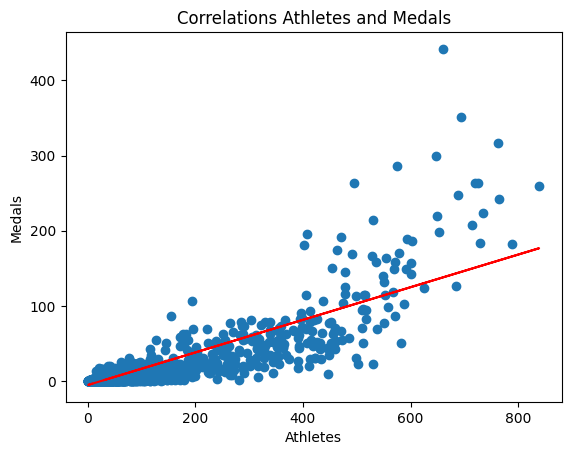

In [4]:
'''
Use matplotlib to create a scatter plot with a line of best-fit
to see the visual correlation between the data. Represents a 
linear relationship between athletes and medals.
'''
plt.scatter(x='athletes', y='medals', label= 'Data Points', data=teams)
plt.title("Correlations Athletes and Medals")
plt.xlabel('Athletes')
plt.ylabel('Medals')

m, b = np.polyfit(teams['athletes'], teams['medals'], 1)
plt.plot(teams['athletes'], m*teams['athletes'] + b, color='red')

plt.show()

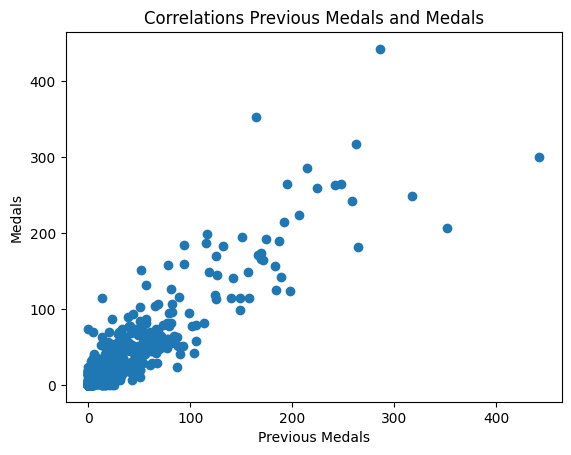

In [5]:
'''
Unable to create a line of best fit between Previous medals and Medals 
due to a Lin Alg Error. This is due to not having enough data to
make the least squares algorithm, this is due to many countries having 0 
medals the last year or not participating 
'''

plt.scatter(x='prev_medals', y='medals', label= 'Data Points', data=teams)
plt.title("Correlations Previous Medals and Medals")
plt.xlabel('Previous Medals')
plt.ylabel('Medals')
plt.show()

In [6]:
teams = teams.dropna() #Clean data of any cells with null values 
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0


In [7]:
'''
Split data for linear regression model, split into training data
and test data to check accuracy of the model. Aim for a 80/20
split for the data between train and test.
'''
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

train.shape, test.shape

((1609, 10), (405, 10))

In [8]:
'''
The Model used for this prediction will be LinearRegression, as a 
linear relationship in the data was established. 
'''

reg = LinearRegression()

predictors = ["athletes", "prev_medals", "height"]
target = "medals"

reg.fit(train[predictors], train[target]) #This format allows for model to be changed easily

LinearRegression()

In [9]:
predictions = reg.predict(test[predictors])

In [10]:
test["predictions"] = predictions 
test.loc[test["predictions"] < 0, "predictions"] = 0 #Find any rows with a predictions value <0, and replace it with 0

In [11]:
test["predictions"] = test["predictions"].round() #Since teams can only have whole number medals 

In [12]:
'''
The error metric for this model will be Mean Absolute Error (MAE),
Which is a measure of the average magnitute of absolute errors 
between predicted and true vales, without care for signs.
'''
from sklearn.metrics import mean_absolute_error

err = mean_absolute_error(test["medals"], test["predictions"])
err
#On aveage the model is about 3.27 medals off how many medals a team got 

3.2666666666666666

In [13]:
teams.describe()["medals"] #By comparing the err to std, we can tell if the models is actually working 

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [14]:
test[test["team"] == "CAN"]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,predictions
348,CAN,Canada,2012,179,354,26.4,174.6,68.9,55,35.0,50.0
349,CAN,Canada,2016,175,405,26.0,174.5,68.4,69,55.0,68.0


In [15]:
test[test["team"] == "USA"]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,predictions
2053,USA,United States,2012,245,689,26.7,178.3,74.7,248,317.0,285.0
2054,USA,United States,2016,245,719,26.4,178.0,73.8,264,248.0,236.0


In [16]:
errors = (test["medals"] - test["predictions"]).abs()
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    1.0
2143    0.0
Length: 405, dtype: float64

In [17]:
'''
Calculate the percentage of error between the predictions made
the amount of medals a team gets.
'''

error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = test["medals"].groupby(test["team"]).mean()
error_ratio = error_by_team / medals_by_team
error_ratio = error_ratio[np.isfinite(error_ratio)] #Used to account for casue of divsion by zero, and casue of NaN

error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.357143
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.500000
Length: 97, dtype: float64

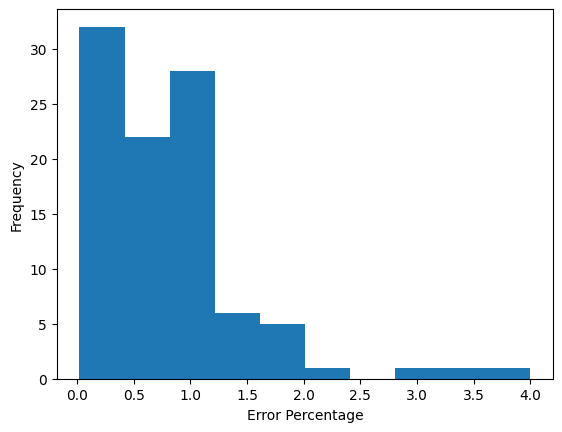

In [18]:
'''
From the frequency we can see the a large majority of 
error precentages fall into the 0-100% area, but there
are also large outliers 
'''

plt.hist(error_ratio)
plt.xlabel('Error Percentage')
plt.ylabel('Frequency')
plt.show()

In [19]:
'''
The data shows that this model works best to predict the medals
earned by countries with a large number of winnings, and have 
particpated from manny years. The model struggles in predicting
for countires that have no previous winnnings or win close to 
no medals at the Olympics. 
'''

'''
If this project is revisted, is would be benificial to train a 
sperate model on countries with lower winning. This could be 
done with a Decision Tree or with Poisson Regression, as to 
handle nonlinear relationships and skewed distributions
'''

error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
LTU    0.083333
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.000000
Length: 97, dtype: float64